In [76]:
import fasttext
import pandas as pd
import re

from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.stats.inter_rater as irr
import seaborn as sns

In [56]:

model = fasttext.load_model('/home/julita/Desktop/semestr2/NLP/cc.pl.300.bin')

In [57]:
df = pd.read_excel('cyberbullying_train_complete_sentences.xlsx', sheet_name='Superanotator')
df

,text,label1,label2,label3,LABEL,"1. Sarkazm uszczypliwy, dokuczliwy -> mowa nienawiści"
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0.0,0.0,0.0,0,NaN
1,@anonymized_account @anonymized_account Brawo ...,0.0,0.0,0.0,0,NaN
2,"@anonymized_account @anonymized_account Super,...",1.0,0.0,1.0,1,Kolumna Label
3,@anonymized_account @anonymized_account Musi. ...,0.0,0.0,0.0,0,201-300 Iza
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0.0,0.0,0.0,0,301-400 Julita
...,...,...,...,...,...,...
10036,@anonymized_account Ty zagrasz? Nie wiedziałem 😉,NaN,NaN,NaN,NaN,NaN
10037,@anonymized_account @anonymized_account A VAR ...,NaN,NaN,NaN,NaN,NaN
10038,@anonymized_account @anonymized_account Szanow...,NaN,NaN,NaN,NaN,NaN
10039,@anonymized_account @anonymized_account @anony...,NaN,NaN,NaN,NaN,NaN


In [58]:
df_for_analysis = df[['text', 'LABEL']][:598]
df_for_analysis

,text,LABEL
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0
1,@anonymized_account @anonymized_account Brawo ...,0
2,"@anonymized_account @anonymized_account Super,...",1
3,@anonymized_account @anonymized_account Musi. ...,0
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0
...,...,...
593,"@anonymized_account Niby sami świnie, a nic ni...",1
594,@anonymized_account Ale co to ma do Mystka?,0
595,@anonymized_account Serio chcecie cichego stad...,0
596,Co to miało być? 😂,0


# Kappa-Cohen, Kappa-Fleissa

In [59]:
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa

In [60]:
df_part1 = df[:100].iloc[:,  :-2]
df_part2 = df[101:199].iloc[:,  :-2].reset_index()

In [61]:
kappa_cohen_1_2 = cohen_kappa_score(df_part1['label1'], df_part1['label2'])
kappa_cohen_1_3 = cohen_kappa_score(df_part1['label1'], df_part1['label3'])
kappa_cohen_2_3 = cohen_kappa_score(df_part1['label2'], df_part1['label3'])
mean_part1 = (kappa_cohen_1_2  + kappa_cohen_1_3 + kappa_cohen_2_3 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3)

Kappa-Cohen (label1, label2): 0.7516556291390728
Kappa-Cohen (label1, label3): 0.6437054631828978
Kappa-Cohen (label2, label3): 0.5591939546599496


In [62]:
kappa_cohen_1_2_2 = cohen_kappa_score(df_part2['label1'], df_part2['label2'])
kappa_cohen_1_3_2 = cohen_kappa_score(df_part2['label1'], df_part2['label3'])
kappa_cohen_2_3_2 = cohen_kappa_score(df_part2['label2'], df_part2['label3'])
mean_part2 = (kappa_cohen_1_2_2  + kappa_cohen_1_3_2 + kappa_cohen_2_3_2 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3_2)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3_2)

Kappa-Cohen (label1, label2): 0.909967845659164
Kappa-Cohen (label1, label3): 0.7934426229508197
Kappa-Cohen (label2, label3): 0.8364329995231283


In [63]:
val_part1 = [kappa_cohen_1_2, kappa_cohen_1_3, kappa_cohen_2_3, mean_part1]
val_part2 = [kappa_cohen_1_2_2, kappa_cohen_1_3_2, kappa_cohen_2_3_2, mean_part2]

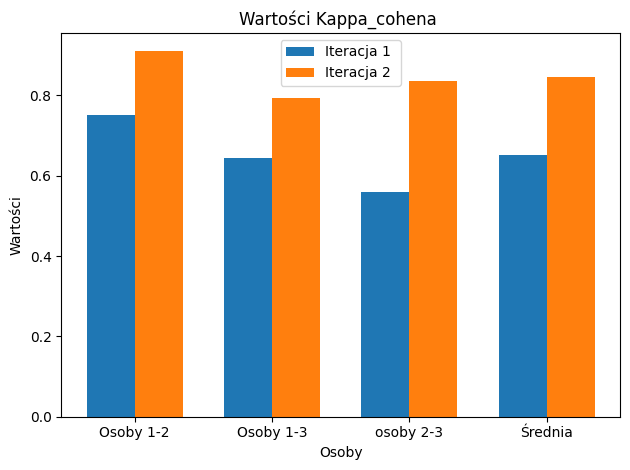

In [82]:
zestawy = ['Osoby 1-2', 'Osoby 1-3', 'osoby 2-3', 'Średnia']
ind = np.arange(len(zestawy))  
szerokość = 0.35  

fig, ax = plt.subplots()

bar1 = ax.bar(ind - szerokość/2, val_part1, szerokość, label='Iteracja 1 ')
bar2 = ax.bar(ind + szerokość/2, val_part2, szerokość, label='Iteracja 2')

ax.set_xlabel('Osoby')
ax.set_ylabel('Wartości')
ax.set_title('Wartości Kappa_cohena ')
ax.set_xticks(ind)
ax.set_xticklabels(zestawy)
ax.legend()

plt.tight_layout()
plt.show()

In [77]:

contingency_matrix1 = np.zeros((len(df_part1), 2), dtype=int)

for i in range(len(df_part1)):
    contingency_matrix1[i, int(df_part1['label1'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label2'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label3'][i])] += 1  

fleiss_kappa1 = irr.fleiss_kappa(contingency_matrix1, method='fleiss')


contingency_matrix2 = np.zeros((len(df_part2), 2), dtype=int)

for i in range(len(df_part2)):
    contingency_matrix2[i, int(df_part2['label1'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label2'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label3'][i])] += 1  

fleiss_kappa2 = irr.fleiss_kappa(contingency_matrix2, method='fleiss')


/tmp/ipykernel_4504/4119753856.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




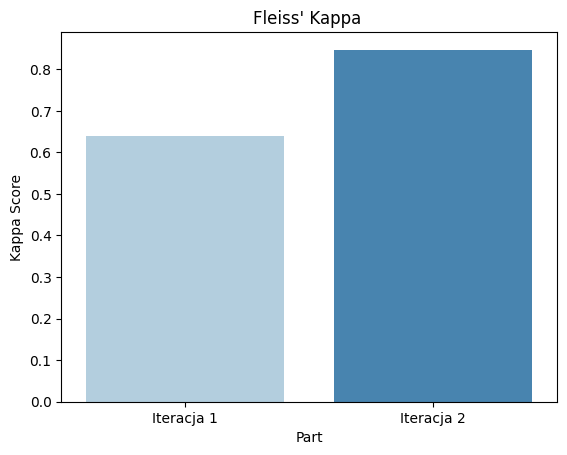

In [80]:
df = pd.DataFrame({
    'Part': ['Iteracja 1', 'Iteracja 2'],
    'Kappa Score': [fleiss_kappa1, fleiss_kappa2]
})

sns.barplot(x='Part', y='Kappa Score', data=df, palette='Blues')

plt.title('Fleiss\' Kappa ')
plt.ylabel('Kappa Score')
plt.show()


# CZĘŚĆ 2

In [83]:
def clean_text(text):
    text = re.sub(r'@anonymized_account', '', text)
    text = re.sub(r'RT', '', text)
    # text = re.sub(r'[^\x00-\x7F]+', '', text)
    # text = re.sub(r'\s+', ' ', text).strip()
    return text

In [84]:
df_for_analysis['text'] = df_for_analysis['text'].apply(clean_text)
df_for_analysis

,text,LABEL
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0
1,Brawo ty Daria kibic ma być na dobre i złe,0
2,"Super, polski premier składa kwiaty na groba...",1
3,Musi. Innej drogi nie mamy.,0
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0
...,...,...
593,"Niby sami świnie, a nic nie wiedzą",1
594,Ale co to ma do Mystka?,0
595,Serio chcecie cichego stadionu ?,0
596,Co to miało być? 😂,0


In [85]:
df_for_analysis['embedding'] = df_for_analysis['text'].apply(lambda x: model.get_sentence_vector(x))

# FASTTEXT

In [86]:

X = np.array(list(df_for_analysis['embedding']))
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['label'] = df_for_analysis['LABEL']
df_tsne['text'] = df_for_analysis['text']

fig = px.scatter(df_tsne, x='x', y='y', color='label', hover_data=['text'],title='TSNE dla FastText')
fig.show()

In [87]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df_tsne['cluster'] = clusterer.fit_predict(X_embedded)

fig = px.scatter(df_tsne, x='x', y='y', color='cluster', hover_data=['text'], title='HDBSCAN')
fig.show()


ORYGINALNE ETYKIETY

In [88]:
from datasets import load_dataset

In [89]:
dataset = load_dataset("poleval/poleval2019_cyberbullying", 'task02', trust_remote_code=True)

In [90]:
df_original = pd.DataFrame(dataset['train'])[:][:598]
df_original

,text,label
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0
1,@anonymized_account @anonymized_account Brawo ...,0
2,"@anonymized_account @anonymized_account Super,...",0
3,@anonymized_account @anonymized_account Musi. ...,0
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0
...,...,...
593,"@anonymized_account Niby sami świnie, a nic ni...",0
594,@anonymized_account Ale co to ma do Mystka?,0
595,@anonymized_account Serio chcecie cichego stad...,0
596,Co to miało być? 😂,0


In [91]:
df_original['embedding'] = df_original['text'].apply(lambda x: model.get_sentence_vector(x))

X = np.array(list(df_original['embedding']))
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['label'] = df_original['label']
df_tsne['text'] = df_original['text']

fig = px.scatter(df_tsne, x='x', y='y', color='label', hover_data=['text'], title='TSNE dla danych zaateykietowanych oryginalnie')
fig.show()

# TF_IDF

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_for_analysis['text'])
X = tfidf_matrix.toarray()

In [94]:
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['label'] = df_for_analysis['LABEL']
df_tsne['text'] = df_for_analysis['text']

fig = px.scatter(df_tsne, x='x', y='y', color='label', hover_data=['text'], title='TSNE dla TF_IDF')
fig.show()


In [95]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df_tsne['cluster'] = clusterer.fit_predict(X_embedded)

fig = px.scatter(df_tsne, x='x', y='y', color='cluster', hover_data=['text'], title='HDBSCAN dla TF_IDF')
fig.show()


# LSA

In [96]:
import pandas as pd
import spacy
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px


df = df_for_analysis
nlp = spacy.load("pl_core_news_sm")


def my_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]


vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
X = vectorizer.fit_transform(df['text'])

svd = TruncatedSVD(n_components=2)
Z = svd.fit_transform(X)


df_result = pd.DataFrame(Z, columns=['Component 1', 'Component 2'])
df_result['text'] = df['text']

fig = px.scatter(df_result, 
                 x='Component 1', 
                 y='Component 2', 
                 text='text',  
                 title='Wizualizacja LSA', 
                 width=2000, 
                 height=1400)

fig.update_traces(
    textposition='top center'
)


fig.update_layout(
    font=dict(
        family="Arial, sans-serif", 
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

/home/julita/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

